In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../gefera')
import gefera as gf

In [2]:
t = np.linspace(67.5, 69, 10000)
#t2 = t1 + 365
#t = np.hstack((t1, t2))

ap = 1.0
tp = 0.3
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 89.8 * np.pi / 180

am = 0.01
tm = -2.05
em = 0.1
pm = 3
om = 90 * np.pi / 180
wm = -90 * np.pi / 180
im = 90.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.1
rm = 0.08

In [3]:
# figure out the lan/lop confusion 
po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)

#%time lc_ng = sys.lightcurve(t, u1, u2, rp, rm)
#%time lc_ng_simp = sys.lightcurve(t, u1, u2, rp, rm, integrate='simpson', dt=0.02)
#%time lc_ng_trap = sys.lightcurve(t, u1, u2, rp, rm, integrate='trapezoid', dt=0.02)
%time lc, grad = sys.lightcurve(t, u1, u2, rp, rm, grad=True)
#%time _, grad_simp = sys.lightcurve(t, u1, u2, rp, rm, grad=True, integrate='simpson', dt=0.02)
#%time _, grad_trap = sys.lightcurve(t, u1, u2, rp, rm, grad=True, integrate='trapezoid', dt=0.02)

CPU times: user 19.2 ms, sys: 10.2 ms, total: 29.4 ms
Wall time: 36 ms


(68.475, 68.5)

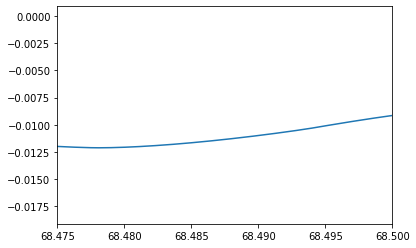

In [4]:
plt.plot(t, sys.lightcurve(t, u1, u2, rp, rm))
plt.xlim(68.475, 68.5)

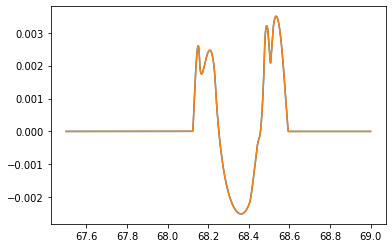

In [9]:
plt.plot(t, sys.lightcurve(t, u1, u2, rp, rm, grad=True)[1]['u2'])

du = 0.00001

po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)
lc1 = sys.lightcurve(t, u1, u2 + du, rp, rm)

po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)
lc2 = sys.lightcurve(t, u1, u2 - du, rp, rm)
plt.plot(t, (lc1 - lc2) / (2 * du))
#plt.ylim(-0.1, 0.1)
#plt.xlim(68.475, 68.5)
#plt.axvline(68.485)

In [ ]:
import animate

fig = plt.figure(figsize=(10, 10))
animate.draw(sys, fig.gca(), 68.485, rp, rm)

In [ ]:
du = 0.2

po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)
lc1 = sys.lightcurve(t, u1 + du, u2, rp, rm)

po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)
lc2 = sys.lightcurve(t, u1 - du, u2, rp, rm)
plt.plot(t, lc1)
plt.plot(t, lc2)

In [ ]:
plt.plot(t, lc)

In [ ]:
import animate
from IPython.display import HTML
fig = plt.figure(figsize=(10, 10))
ani = animate.animate(sys, fig, t[::40], rp, rm, ld_params=(u1, u2))
HTML(ani.to_html5_video())

In [ ]:
plt.plot(t, grad['a2'])

In [ ]:
plt.plot(t, lc_ng)
plt.plot(t, lc_ng_simp)
plt.plot(t, lc_ng_trap)

In [ ]:
plt.plot(t, grad['a1'])
plt.plot(t, grad_simp['a1'])
plt.plot(t, grad_trap['a1'])

In [ ]:
import animate

fig, axs = plt.subplots(1, len(t[::100]))
animate.snapshots(sys, axs, t[::100], rp, rm, ld_params=(0.5, 0.1));

In [ ]:
edge = plt.Circle(
            (0.005, -0.0), 
            radius=1.0, 
            color='w',
            fill=False, 
            linewidth=4
        )

list(axs.values())[1:][0].imshow(np.random.randn(100, 100))

In [ ]:
lower = [['67.9', '68', '68.1', '68.2', '68.3', '68.4', '68.5', '68.6']]
outer = [[lower],
          ['upper']]

fig, axs = plt.subplot_mosaic(outer, figsize=(12, 7))

axs['upper'].plot(t, lc + 1, linewidth=3, color='k')
axs['upper'].grid()
axs['upper'].tick_params(axis='both', which='major', labelsize=12)
axs['upper'].set_xlabel('time (days)', fontsize=20)
axs['upper'].set_ylabel('relative flux', fontsize=20)

time = [67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6]
animate.snapshots(sys, list(axs.values())[:-1], time, rp, rm, ld_params=(u1, u2))
[ax.set_xlim(-1.45, 1.65) for ax in list(axs.values())[:-1]]
axs['upper'].set_xlim(67.87, 68.638)
plt.subplots_adjust(hspace=-0.3, top=1.2)
plt.savefig('/Users/tgordon/Desktop/demo.pdf')

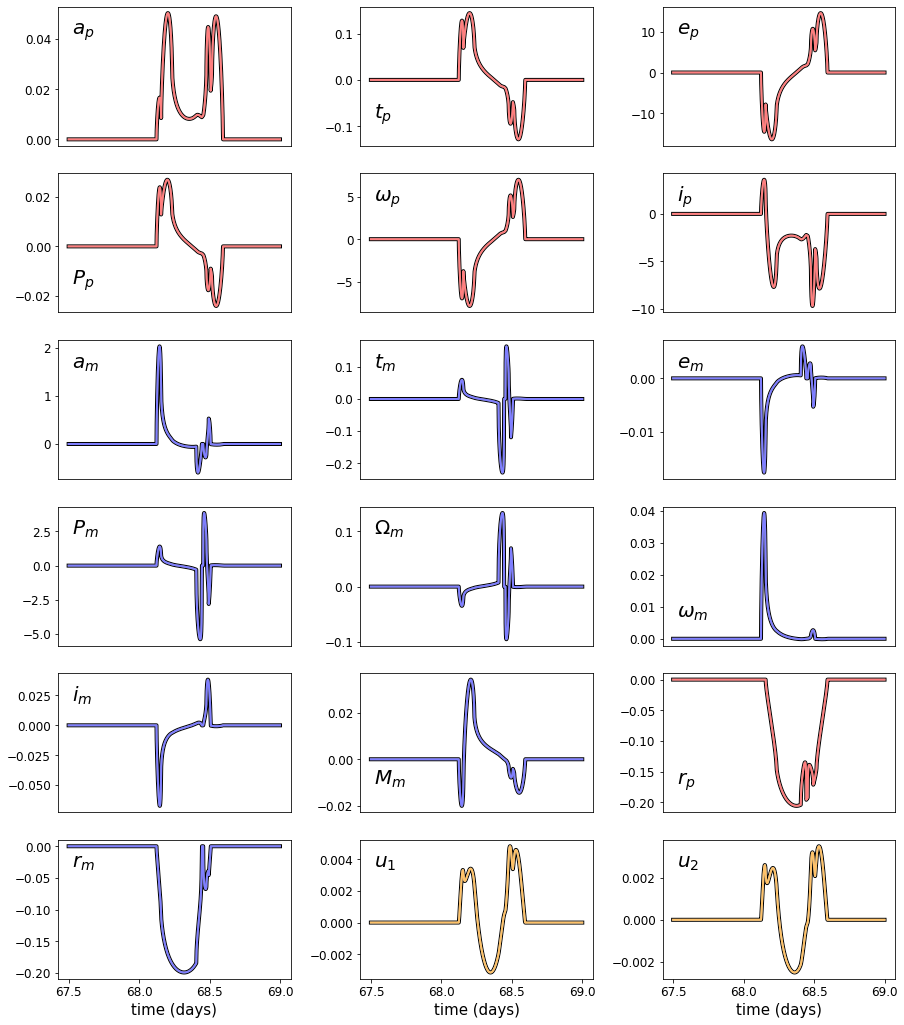

In [10]:
from matplotlib import cm
fig, axs = plt.subplots(6, 3, figsize=(15, 15))
axs = axs.flatten()

names = [
    r'$a_p$', r'$t_p$', r'$e_p$', r'$P_p$', r'$\omega_p$', 
    r'$i_p$', r'$a_m$', r'$t_m$', r'$e_m$', r'$P_m$', 
    r'$\Omega_m$', r'$\omega_m$', r'$i_m$', r'$M_m$', 
    r'$r_p$', r'$r_m$', r'$u_1$', r'$u_2$'
]

lower_left = (0.06, 0.2)
pos = [
    None, 
    lower_left, 
    None, 
    lower_left, 
    None, 
    None, 
    None, 
    None, 
    None, 
    None, 
    None, 
    lower_left, 
    None, 
    lower_left, 
    lower_left, 
    None, 
    None, 
    None
]

moon_color = 'b'
moon_alpha = 0.5
planet_color = 'r'
planet_alpha = 0.5
star_color ='#ffae36'
star_alpha = 0.75

#axs[0].plot(t, lc, color='k', linewidth=2)
for i, (name, gradient) in enumerate(list(grad.items())):
    if i < 6:
        color = planet_color
        alpha = planet_alpha
    elif i < 14:
        color = moon_color
        alpha = moon_alpha
    else:
        color = star_color
        alpha = star_alpha
        
    if i == 14:
        color = planet_color
        alpha = planet_alpha
    if i == 15:
        color = moon_color
        alpha = moon_alpha
        
    axs[i].plot(t, gradient, color='k', linewidth=4, alpha=1)
    axs[i].plot(t, gradient, color='w', linewidth=2, alpha=1)
    axs[i].plot(t, gradient, color=color, linewidth=2, alpha=alpha)
        
    if pos[i] is not None:
        axs[i].annotate(names[i], xy=pos[i], xycoords='axes fraction', fontsize=20)
    else:
        axs[i].annotate(names[i], xy=(0.06, 0.8), xycoords='axes fraction', fontsize=20)

[ax.axes.xaxis.set_visible(False) for ax in axs[:-3]]
[ax.tick_params(axis='both', which='major', labelsize=12) for ax in axs]
[ax.set_xlabel('time (days)', fontsize=15) for ax in axs[-3:]]
#[ax.axes.yaxis.set_visible(False) for ax in axs]
#axs[-1].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.2, bottom=0.05, top=0.95)
#plt.savefig('/Users/tgordon/Desktop/derivatives.pdf')

In [ ]:
plt.plot(t, grad['w2'])

In [ ]:
d = 0.000001

moon = system.moon(0.05, am, t0m, em, Pm, Om, wm, im, mm)
planet = system.planet(0.1, ap, t0p, ep, Pp, wp, ip)
star = system.star(0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t)
lc1 = sys._lc

sys.compute(t, grad=True)
lc = sys._lc

moon = system.moon(0.05, am, t0m, em, Pm, Om, wm, im, mm)
planet = system.planet(0.1, ap + d, t0p, ep, Pp, wp, ip)
star = system.star(0.5, 0.5)
sys = system.system(star, planet, moon)
sys.compute(t)
lc2 = sys._lc

sys.compute(t, grad=True)
grad = sys.grad()

plt.plot(t, (lc2 - lc1)/d)
plt.plot(t, grad['a_p'])

In [ ]:
n = 2 * np.pi / Pp
x = (1 - (1 - ep**2)) / (ep * (1 + ep * np.cos(np.pi * 0.5 - wp)))
E = np.arccos(x)
M = E - ep * np.sin(E)
tt = M / n + t0p
tt

In [ ]:
t0p = tt - M / n

In [ ]:
from kep import grad_impacts, impacts
ms = ac.M_sun.value / ac.M_earth.value
%time bp, bpm, theta, dbp, dbpm, dtheta = grad_impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
%time bp, bpm, theta = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)

In [ ]:
d = 0.000001
ms = ac.M_sun.value / ac.M_earth.value
bp1, bpm1, theta1 = impacts(t, ms, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = impacts(t, ms, t0p, ep, Pp, Op + d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
bp3, bpm3, theta3 = impacts(t, ms, t0p, ep, Pp, Op - d, wp, ip, mp, t0m, em, Pm, Om , wm, im, mm)
plt.plot(t, (bp2 - bp3)/(2 * d))
plt.plot(t, dbp[:, 4])
plt.figure()
plt.plot(t, dbp[:, 4] - (bp2 - bp3)/(2 * d))

In [ ]:
d = 0.0000000001
bp1, bpm1, theta1 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp, t0m, em, Pm, Om, wm, im, mm)
bp2, bpm2, theta2 = input_coords(t, 1, t0p, ep, Pp, Op, wp, ip, mp + d, t0m, em, Pm, Om, wm, im, mm)
plt.plot(t, dbp[:, 7])
plt.plot(t, (bp2 - bp1)/d)
plt.figure()
plt.plot(t, dbp[:, 7] - (bp2 - bp1)/d)
#plt.plot(t, (bpm1-bpm2)/d)
#plt.plot(t, (theta1-theta2)/d)

In [ ]:
plt.plot(t, bp1)
plt.plot(t, bp2)

In [ ]:
plt.plot(t, bp2)
plt.plot(t, bp1)

In [ ]:
[plt.plot(t, dbp[:, i]) for i in range(15)];

In [ ]:
star = system.star(1, 0.5, 0.5)
planet = system.rock(0.1, 10, t0p, ep, Pp, Op, wp, ip)
moon = system.rock(0.05, 5, t0m, em, Pm, Om, wm, im)
sys = system.system(star, planet, moon)
%time sys.compute(t)

In [ ]:
plt.plot(t, sys.lightcurve())

In [ ]:
plt.plot(t, sys.derivatives());

In [ ]:
a = np.random.randn(15, 100000)
b = np.random.randn(15, 100000)
c = np.random.randn(15, 100000)
d = np.random.randn(15, 100000)
e = np.random.randn(15, 100000)
f = np.random.randn(15, 100000)
g = np.random.randn(15, 100000)
h = np.random.randn(15, 100000)
i = np.random.randn(15, 100000)
j = np.random.randn(15, 100000)

In [ ]:
j

In [ ]:
mp = 10
mm = 5

In [ ]:
(1, 2, 3) + (4, 5, 6)

In [ ]:
def testfunc(a, b, c, d, e, f):
    return a + b + c + d + e + f

In [ ]:
testfunc(*((1, 2, 3) + (4, 5, 6)))

In [ ]:
from phot import flux

In [ ]:
lc = flux(0.5, 0.5, 0.1, 0.05, bp, bpm, np.cos(theta), np.sin(theta))
plt.plot(t, lc[:, 0])

In [ ]:
dflux = lc[:, 3][:, None] * dbp + lc[:, 4][:, None] * dbpm + lc[:, 5][:, None] * dtheta

In [ ]:
dflux

In [ ]:
np.shape(np.hstack([np.ones(len(t))[:, None], dflux, np.ones(len(t))[:, None]]))

In [ ]:
np.shape(dflux)

In [ ]:
arr = np.vstack([np.array([1, 2, 3]), np.array([4, 5, 6])])
names = ['line1', 'line2']

In [ ]:
d = {}
{names[i]: arr[i] for i in range(len(names))}

In [ ]:
(1,) + (2, 3)

In [ ]:
str(1)